In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import requests

In [16]:
# Загрузка данных
url = "http://lib.stat.cmu.edu/datasets/boston"
text = requests.get(url).text.split("\n")
feature_names = [line.split()[0] for line in text[7:21]]
DESCR = "\n".join(text[:21])
lines1 = [line.split() for line in text[22::2]]
lines2 = [line.split() for line in text[23::2]]
table = [a + b for a, b in zip(lines1, lines2)]
data = pd.DataFrame()
for line in table:
    line = [i.strip() for i in line]
    data = data._append(pd.Series(line, index=feature_names), ignore_index=True)

data = data.astype(float)
target = data["MEDV"].to_numpy()
data.drop("MEDV", axis=1, inplace=True)
feature_names = feature_names[:-1]

In [17]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [18]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Применение TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

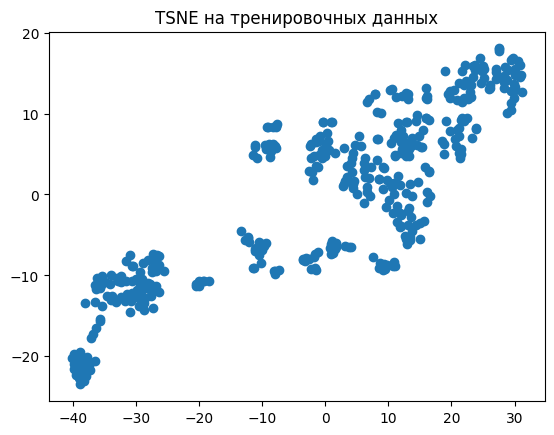

In [20]:
# Построение диаграммы рассеяния
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title("TSNE на тренировочных данных")
plt.show()

In [21]:
# Кластеризация с помощью KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

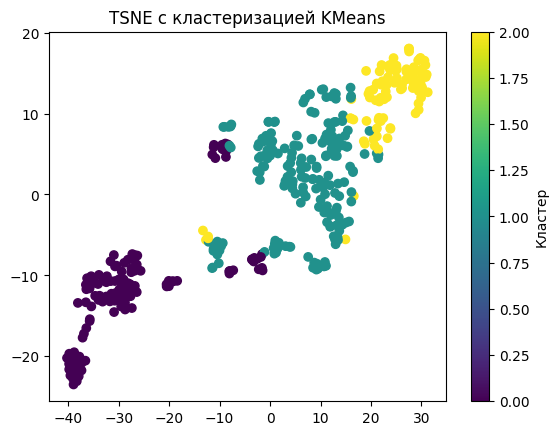

In [22]:
# Построение диаграммы рассеяния с цветовой маркировкой кластеров
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train, cmap="viridis")
plt.title("TSNE с кластеризацией KMeans")
plt.colorbar(label="Кластер")
plt.show()

In [23]:
# Вычисление средних значений price и CRIM в разных кластерах на тренировочных данных
cluster_means_train = {"price": {0: 0, 1: 0, 2: 0}, "CRIM": {0: 0, 1: 0, 2: 0}}

for cluster in range(3):
    cluster_means_train["price"][cluster] = y_train[labels_train == cluster].mean()
    cluster_means_train["CRIM"][cluster] = X_train_scaled[labels_train == cluster][:, 0].mean()

for feature in ["price", "CRIM"]:
    print(f"Средние значения {feature} в разных кластерах на тренировочных данных:")
    for cluster in range(3):
        print(f"Кластер {cluster}: {cluster_means_train[feature][cluster]}")

Средние значения price в разных кластерах на тренировочных данных:
Кластер 0: 16.165354330708663
Кластер 1: 24.958115183246072
Кластер 2: 27.78837209302326
Средние значения CRIM в разных кластерах на тренировочных данных:
Кластер 0: 0.8109035550510463
Кластер 1: -0.3595938819415385
Кластер 2: -0.39886418651917477


In [24]:
# Применение модели KMeans к тестовым данным
labels_test = kmeans.predict(X_test_scaled)

In [25]:
# Вычисление средних значений price и CRIM в разных кластерах на тестовых данных
cluster_means_test = {"price": {0: 0, 1: 0, 2: 0}, "CRIM": {0: 0, 1: 0, 2: 0}}

for cluster in range(3):
    cluster_means_test["price"][cluster] = y_test[labels_test == cluster].mean()
    cluster_means_test["CRIM"][cluster] = X_test_scaled[labels_test == cluster][:, 0].mean()

for feature in ["price", "CRIM"]:
    print(f"Средние значения {feature} в разных кластерах на тестовых данных:")
    for cluster in range(3):
        print(f"Кластер {cluster}: {cluster_means_test[feature][cluster]}")

Средние значения price в разных кластерах на тестовых данных:
Кластер 0: 16.43714285714286
Кластер 1: 21.860784313725492
Кластер 2: 31.35
Средние значения CRIM в разных кластерах на тестовых данных:
Кластер 0: 0.7396611726050218
Кластер 1: -0.37714580006591175
Кластер 2: -0.40016218898562134
